In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
from wordcloud import WordCloud,STOPWORDS 

drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
os.chdir('/content/drive/My Drive/Projects')

In [3]:

movies = pd.read_csv('movies.csv')

user_rating = pd.read_csv(r'ratings.csv')

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
user_rating.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


# Basic EDA

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

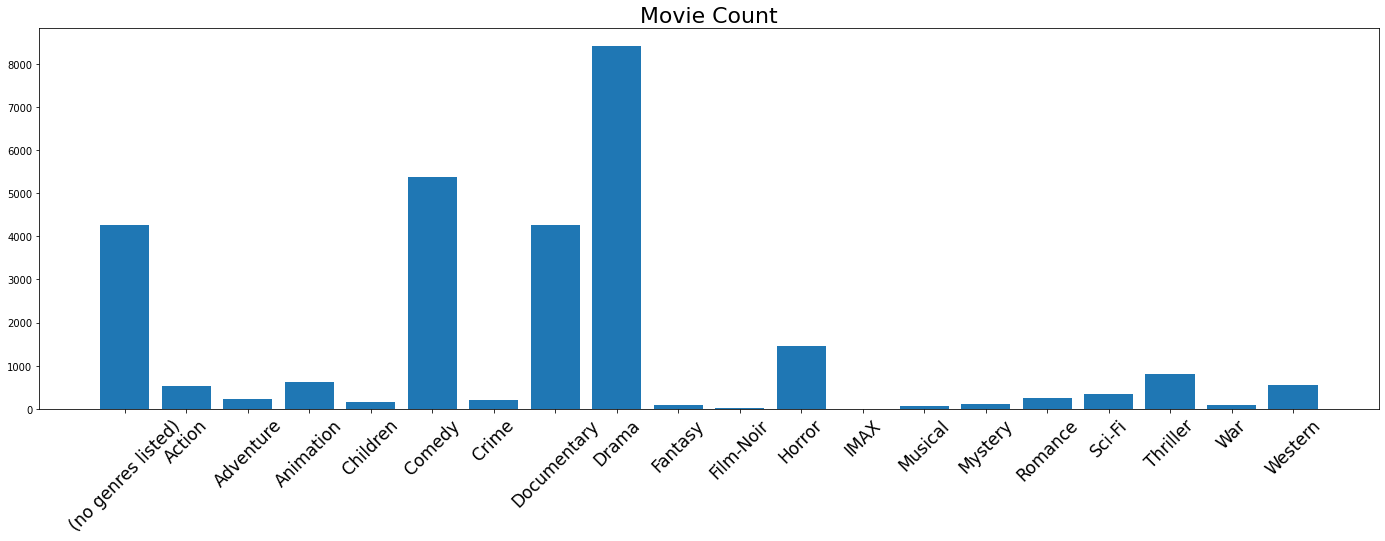

In [6]:


plt.figure(figsize = (24,7))

def split_fun(series):
    return series.split('|')


splitted_data = movies.genres.transform(split_fun)
l = []
append = l.extend
for i in splitted_data:
    append(i)

l = np.unique(l)
count = {}

for i in l:
    count[i] = movies['genres'].isin([i]).sum()

plt.bar(count.keys(),count.values())
plt.title('Movie Count', fontsize = 22)
plt.xticks(rotation = 45, fontsize = 17)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(10, 70, 'Mostly Users have given rating between 3 and 4')

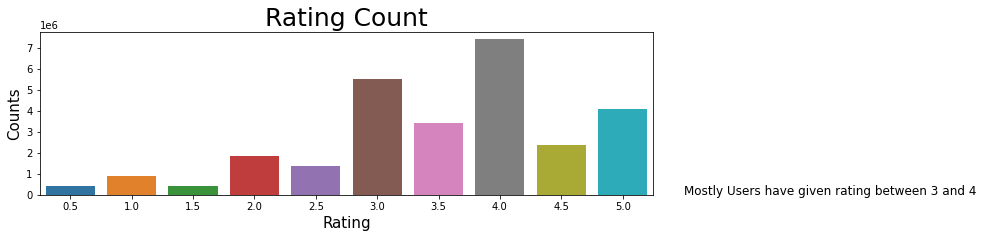

In [7]:
plt.figure(figsize = (11,3))
sns.countplot(user_rating.rating)
plt.title('Rating Count',fontsize = 25)
plt.xlabel('Rating',fontsize = 15)
plt.ylabel('Counts',fontsize = 15)
plt.text(s = 'Mostly Users have given rating between 3 and 4',x = 10,y = 70,fontsize = 12)

In [8]:
data_f = pd.merge(movies,user_rating,on = 'movieId')[['userId','movieId','rating','title']]
data_f.head()

,userId,movieId,rating,title
0,4,1,4.0,Toy Story (1995)
1,10,1,5.0,Toy Story (1995)
2,14,1,4.5,Toy Story (1995)
3,15,1,4.0,Toy Story (1995)
4,22,1,4.0,Toy Story (1995)


In [9]:

rating_average = data_f.groupby('title').mean()[['rating']]
rating_average.reset_index(inplace = True)
rating_average.columns = ['title', 'Ratings']

movie_count = pd.DataFrame(data_f['title'].value_counts())
movie_count.reset_index(inplace = True)
movie_count.columns = ['title', 'Counts']

count_data = pd.merge(rating_average,movie_count, on = 'title')
count_data.head()

,title,Ratings,Counts
0,"""Great Performances"" Cats (1998)",2.815556,225
1,#1 Cheerleader Camp (2010),2.777778,9
2,#Captured (2017),2.500000,1
3,#Horror (2015),2.078947,19
4,#SCREAMERS (2016),2.500000,1


Now we will to Create a Prefrence scale by giving 50% weightage to Ratings and 50% Preference to Vote Counts to get the most popular selections between users

In [10]:

scaling_function = lambda X : (X - np.mean(X))/np.std(X)
preference_fun = lambda X,Y : 0.5*X + 0.5*Y

scaled_data = count_data[['Ratings','Counts']].transform(scaling_function)
preference_data = preference_fun(scaled_data.iloc[:,0],scaled_data.iloc[:,1])
count_data['Preference Ratio'] = preference_data
count_data.sort_values(by = 'Preference Ratio',ascending = False, inplace = True)

count_data.head(10)

,title,Ratings,Counts,Preference Ratio
38745,"Shawshank Redemption, The (1994)",4.424188,97999,17.518434
16416,Forrest Gump (1994),4.056585,97040,17.105397
35131,Pulp Fiction (1994),4.173971,92406,16.396166
39146,"Silence of the Lambs, The (1991)",4.151412,87899,15.613477
28311,"Matrix, The (1999)",4.149695,84545,15.041258
40736,Star Wars: Episode IV - A New Hope (1977),4.120455,81815,14.556581
23519,Jurassic Park (1993),3.665034,76451,13.333883
37864,Schindler's List (1993),4.257502,71516,12.896185
7064,Braveheart (1995),4.008481,68803,12.265079
49156,Toy Story (1995),3.886649,68469,12.125437


([<matplotlib.axis.YTick at 0x7ff6e0d784a8>,
 [Text(0, 0, 'Shawshank Redemption, The (1994)'),
  Text(0, 0, 'Forrest Gump (1994)'),
  Text(0, 0, 'Pulp Fiction (1994)'),
  Text(0, 0, 'Silence of the Lambs, The (1991)'),
  Text(0, 0, 'Matrix, The (1999)'),
  Text(0, 0, 'Star Wars: Episode IV - A New Hope (1977)'),
  Text(0, 0, 'Jurassic Park (1993)'),
  Text(0, 0, "Schindler's List (1993)"),
  Text(0, 0, 'Braveheart (1995)'),
  Text(0, 0, 'Toy Story (1995)')])

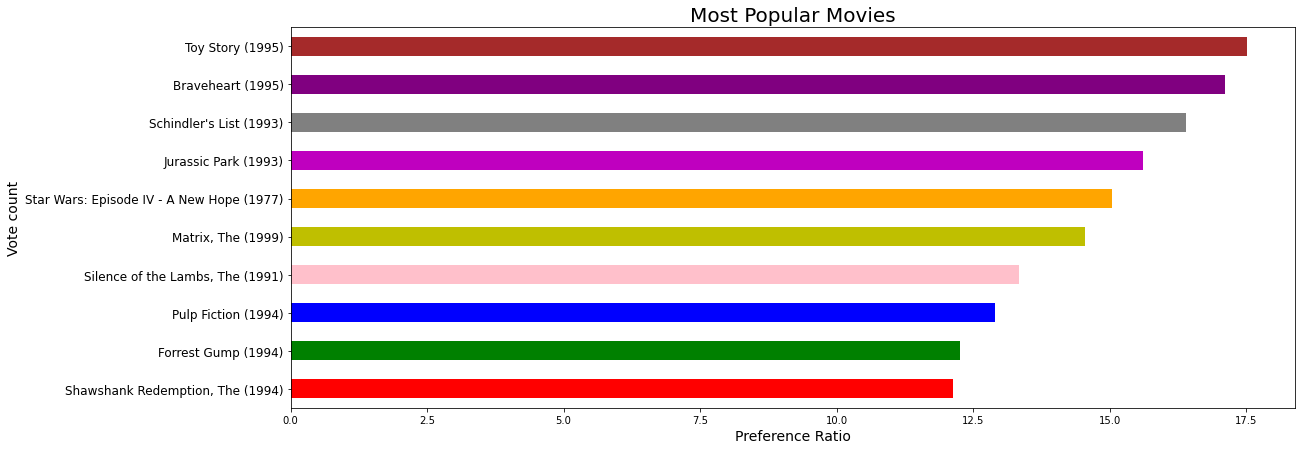

In [11]:
plt.figure(figsize = (18,7))
count_data['Preference Ratio'].head(10)\
   .sort_values(ascending = True)\
   .plot(kind = 'barh',color = ['r','g','b','pink','y','orange','m','gray','purple','brown'])
plt.title('Most Popular Movies',fontsize = 20)
plt.xlabel('Preference Ratio', fontsize = 14)
plt.ylabel('Vote count', fontsize = 14)
plt.yticks(np.arange(10), count_data.head(10).title,fontsize = 12)


In [12]:
for i in np.unique(data_f.head(1000).title):
    data_f.drop(data_f[data_f['title']==i].sample(2000).index, inplace = True)

In [13]:
corelation_table = data_f.head(10000000).pivot_table(index = 'userId', columns = 'title', values= 'rating')
corelation_table.head()

title,'Til There Was You (1997),1-900 (06) (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (One Eight Seven) (1997),2 Days in the Valley (1996),2 ou 3 choses que je sais d'elle (2 or 3 Things I Know About Her) (1967),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"301, 302 (301/302) (1995)","39 Steps, The (1935)",8 1/2 (8½) (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Walk in the Sun (1945),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)",Adrenalin: Fear the Rush (1996),"Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)","Age of Innocence, The (1993)",Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),...,When Night Is Falling (1995),When We Were Kings (1996),When a Man Loves a Woman (1994),When the Cat's Away (Chacun cherche son chat) (1996),While You Were Sleeping (1995),"White Balloon, The (Badkonake sefid) (1995)",White Man's Burden (1995),White Squall (1996),"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (Les roseaux sauvages) (1994),William Shakespeare's Romeo + Juliet (1996),Willy Wonka & the Chocolate Factory (1971),Window to Paris (Okno v Parizh) (1994),Windows (1980),Wings of Courage (1995),"Wings of Desire (Himmel über Berlin, Der) (1987)",Winnie the Pooh and the Blustery Day (1968),With Honors (1994),Withnail & I (1987),"Wizard of Oz, The (1939)",Wolf (1994),Women Robbers (Diebinnen) (1995),"Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (Macht der Bilder: Leni Riefenstahl, Die) (1993)","Wooden Man's Bride, The (Yan shen) (1994)","World of Apu, The (Apur Sansar) (1959)",Wyatt Earp (1994),Yankee Zulu (1994),"Yes, Madam (a.k.a. Police Assassins) (a.k.a. In the Line of Duty 2) (Huang gu shi jie) (1985)",Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,3.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,3.5,NaN,NaN,2.5,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4

# Testing time

In [56]:
movie_name = input('Enter The Last Watched Movie : ')

Enter The Last Watched Movie : 187 (One Eight Seven) (1997)


In [57]:
corr_with_movies = corelation_table.corrwith(corelation_table[movie_name])
preffered_movies = corr_with_movies.sort_values(ascending = False)
preffered_movies

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
Bird of Prey (1996)                                  1.0
Century (1993)                                       1.0
Dingo (1991)                                         1.0
Love Is All There Is (1996)                          1.0
Entertaining Angels: The Dorothy Day Story (1996)    1.0
                                                    ... 
Wedding Bell Blues (1996)                            NaN
Windows (1980)                                       NaN
Wings of Courage (1995)                              NaN
Women Robbers (Diebinnen) (1995)                     NaN
Yankee Zulu (1994)                                   NaN
Length: 1565, dtype: float64

In [58]:
preffered_movies.drop(movie_name, inplace = True)

preffered_movies = pd.DataFrame(preffered_movies).reset_index()
preffered_movies.columns = ['title','Correlation']

df_frame = pd.merge(preffered_movies,count_data,on = 'title')
df_frame.head()

,title,Correlation,Ratings,Counts,Preference Ratio
0,Bird of Prey (1996),1.0,2.583333,36,-0.411474
1,Century (1993),1.0,2.812500,24,-0.257816
2,Dingo (1991),1.0,3.298319,119,0.088435
3,Love Is All There Is (1996),1.0,3.029412,51,-0.105844
4,Entertaining Angels: The Dorothy Day Story (1996),1.0,3.585366,41,0.270181


In [59]:
selected_movies = df_frame[df_frame['Counts']>100].sort_values(by = 'Correlation', ascending = False)
final_movies = selected_movies[['title']].head(20).title.values
print('\nMost Recommended Movies are : \n',*final_movies, sep = "\n")


Most Recommended Movies are : 

Dingo (1991)
Butterfly Kiss (1995)
Talking About Sex (1994)
Two Bits (1995)
Captives (1994)
Ed's Next Move (1996)
Denise Calls Up (1995)
Margaret's Museum (1995)
Loaded (1994)
Mad Dog Time (1996)
Man of No Importance, A (1994)
Rough Magic (1995)
Faithful (1996)
Somebody to Love (1994)
Original Gangstas (1996)
Switchblade Sisters (1975)
Life Is Rosy (a.k.a. Life Is Beautiful) (Vie est belle, La) (1987)
Three Wishes (1995)
Suture (1993)
Nina Takes a Lover (1994)


In [60]:
final_corr =selected_movies[['Correlation']].head(20).Correlation.values

Text(0.5, 1.0, 'Most Recommended Movies after watching " 187 (One Eight Seven) (1997)" ')

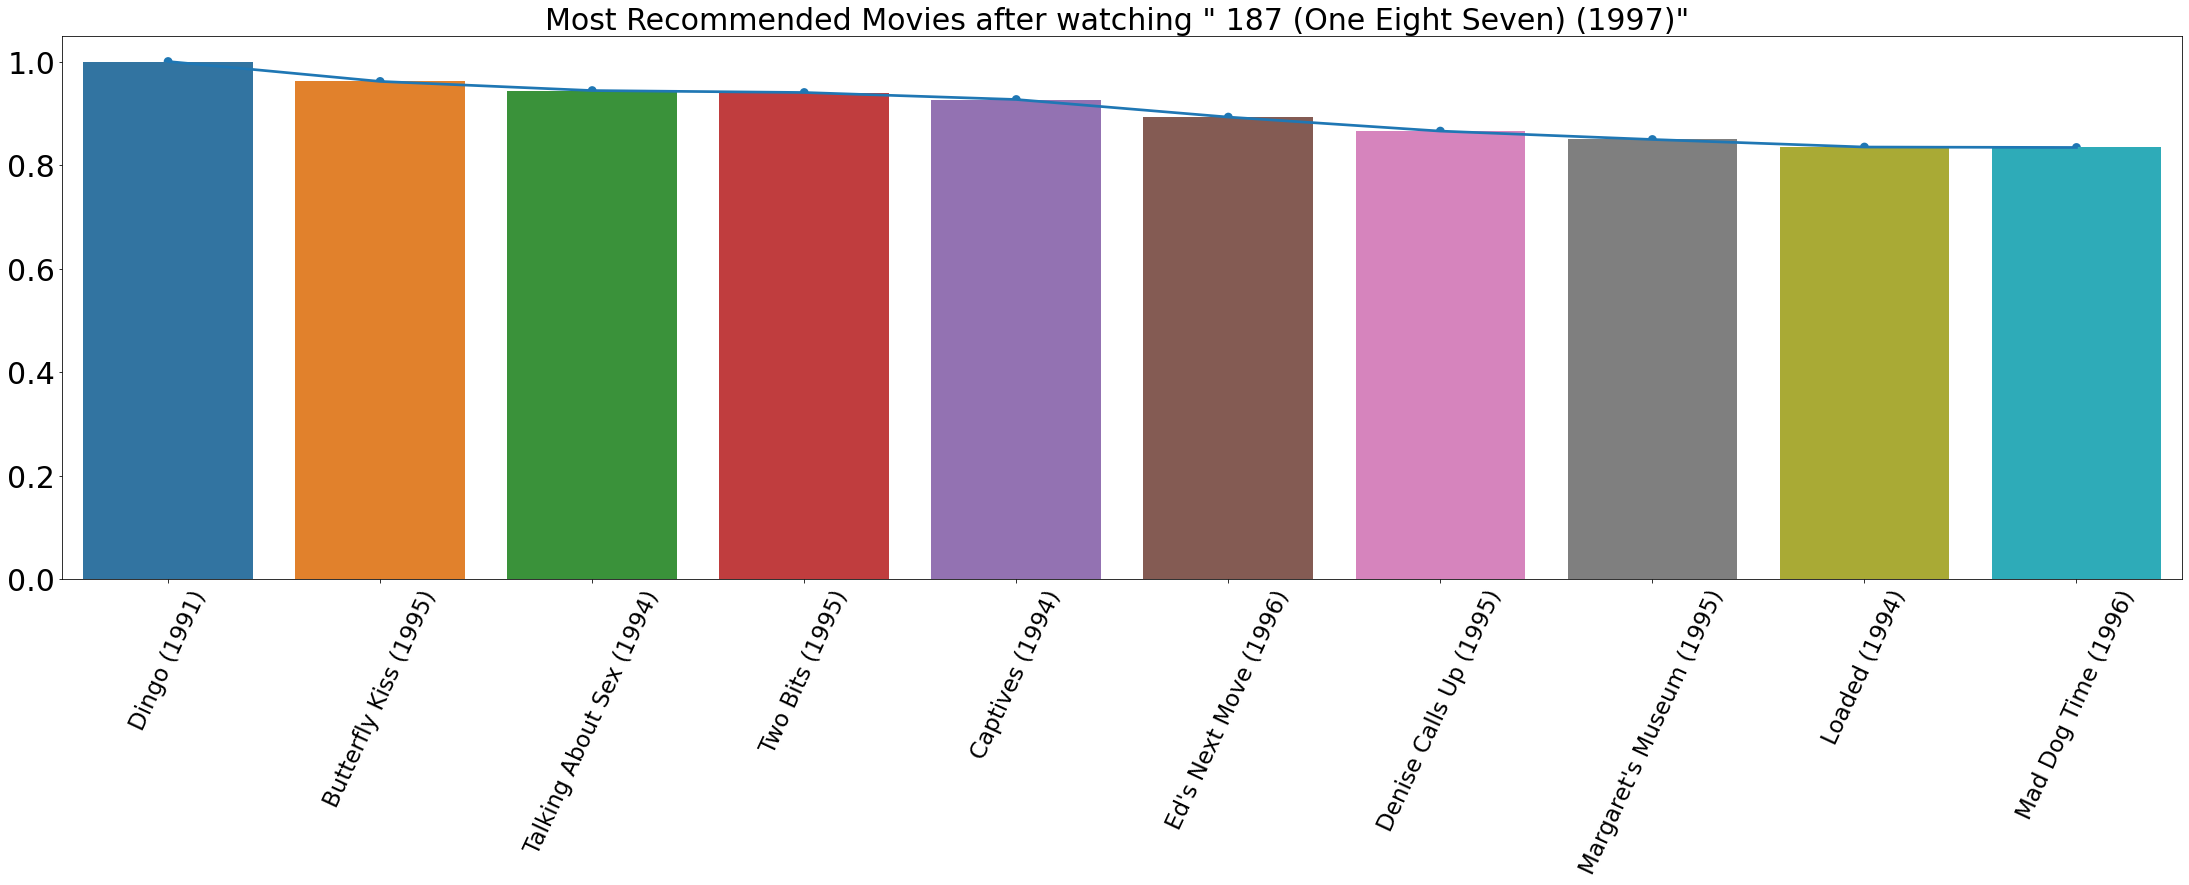

In [61]:
plt.figure(figsize = (38,10))
sns.pointplot(x =final_movies[0:10],y = final_corr[0:10])
sns.barplot(x =final_movies[0:10],y = final_corr[0:10])
plt.yticks(fontsize = 30)
plt.xticks(fontsize = 23,rotation = 65)
print('\n')
plt.title('Most Recommended Movies after watching " {}" '.format(movie_name),fontsize = 30)

In [62]:
movies_list = zip(final_movies,selected_movies['Correlation'].values)
values = dict(movies_list)
wordcloud = WordCloud(background_color = 'white',width = 3500,height = 2300).generate_from_frequencies(values)

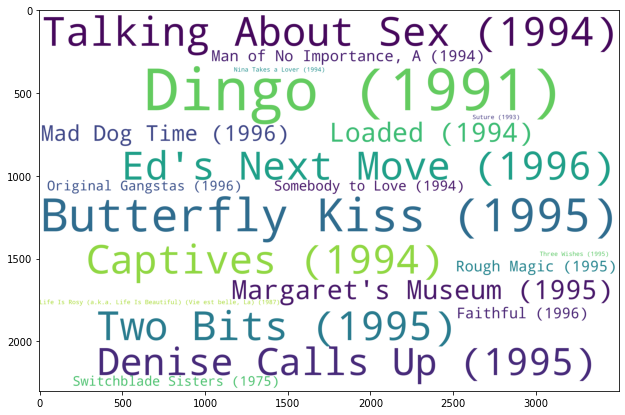

In [63]:
plt.figure(figsize = (17,7))
plt.imshow(wordcloud)

## Creating Data file for Future Use

In [ ]:
#count_data.to_csv('count_data.csv',index = False)
corelation_table.to_pickle('pivot_data')

In [ ]:
np.savez('pivot_table.npz',arr_1 = corelation_table.to_numpy(),
         arr_2 = corelation_table.columns,
         arr_3 = corelation_table.index)

In [ ]:
help(sns.barplot)

Help on function barplot in module seaborn.categorical:

barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x7f22a0458d90>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
    Show point estimates and confidence intervals as rectangular bars.
    
    A bar plot represents an estimate of central tendency for a numeric
    variable with the height of each rectangle and provides some indication of
    the uncertainty around that estimate using error bars. Bar plots include 0
    in the quantitative axis range, and they are a good choice when 0 is a
    meaningful value for the quantitative variable, and you want to make
    comparisons against it.
    
    For datasets where 0 is not a meaningful value, a point plot will allow you
    to focus on differences between levels of one or more categorical
    variab